In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'data.csv' with your actual file path)
df = pd.read_csv('pre_processed_data.csv')
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y")

# Display the first few rows and basic information about the dataset
print(df.info())
print("\nGeneral Statistics:")
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sno       2207 non-null   int64         
 1   product   2207 non-null   object        
 2   title     2207 non-null   object        
 3   content   2207 non-null   object        
 4   date      2207 non-null   datetime64[ns]
 5   author    2207 non-null   object        
 6   rating    2207 non-null   int64         
 7   category  2207 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 138.1+ KB
None

General Statistics:
               sno                           date       rating
count  2207.000000                           2207  2207.000000
mean   1104.077028  2021-09-28 07:16:30.122337792     4.594472
min       1.000000            2010-08-01 00:00:00     1.000000
25%     552.500000            2020-05-01 00:00:00     5.000000
50%    1104.000000    

,sno,product,title,content,date,author,rating,category
0,1,Intel Core I5 12400F 12 Gen Generation Desktop...,great processor,processor power efficient develop android apps...,2024-04-01,ARUN,5,i5
1,2,Intel Core I5 12400F 12 Gen Generation Desktop...,got,try get check ranking detail section buying an...,2024-05-01,Ayush,5,i5
2,3,Intel Core I5 12400F 12 Gen Generation Desktop...,highest price performance processor gaming,upgrade performance gain huge use cooler maste...,2024-03-01,Hruaia,5,i5
3,4,Intel Core I5 12400F 12 Gen Generation Desktop...,nice processor,best aaaaaaaa gaming multitasking processor pr...,2024-04-01,Mr.GeAr,5,i5
4,5,Intel Core I5 12400F 12 Gen Generation Desktop...,title,run well productivity task core cpu minimum re...,2024-01-01,Joy Mukherjee,5,i5


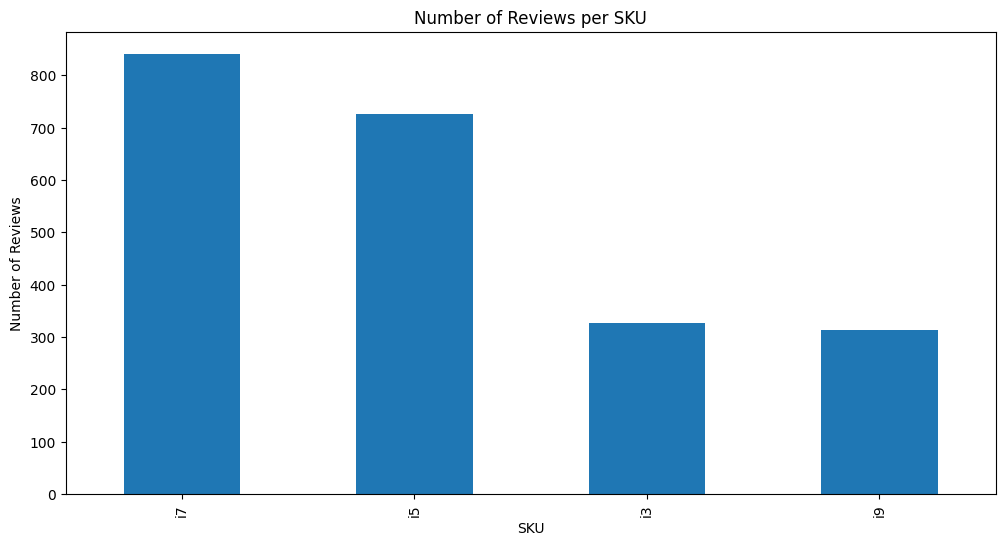

In [2]:
sku_counts = df['category'].value_counts()
plt.figure(figsize=(12, 6))
sku_counts.plot(kind='bar')
plt.title('Number of Reviews per SKU')
plt.xlabel('SKU')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()


In [3]:
# Check for missing values
print(df.isnull().sum())

# Convert data types (if needed)
df['rating'] = df['rating'].astype(int)  # Example: convert 'rating' column to integer

sno         0
product     0
title       0
content     0
date        0
author      0
rating      0
category    0
dtype: int64


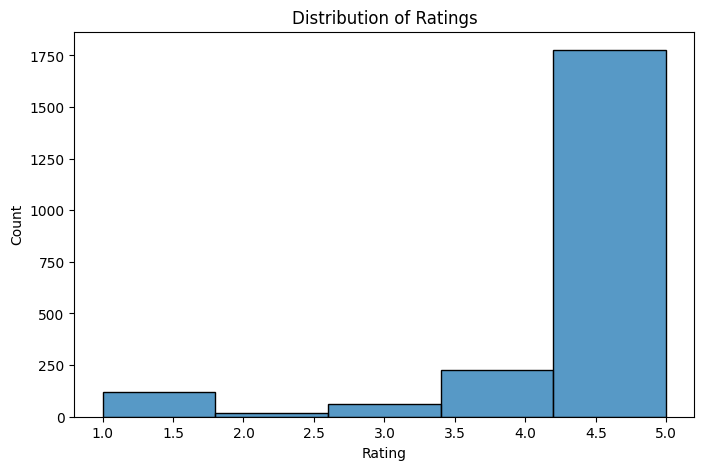

In [4]:
# Histogram of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


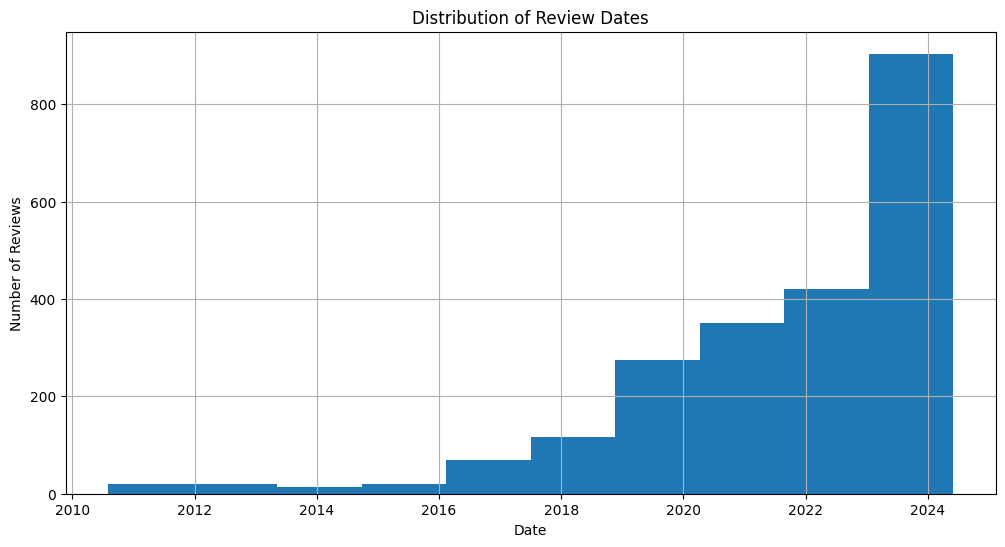

In [5]:
# Distribution of review dates
plt.figure(figsize=(12, 6))
df['date'].hist(bins=10)
plt.title('Distribution of Review Dates')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


In [6]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['content'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_grouped=df[['category','lemmatized']].groupby(by='category').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
category,
i3,good budget build build wife performance cpu d...
i5,processor power efficient develop android app ...
i7,dedicate gamer understand importance powerful ...
i9,primary use case gaming encoding video persona...


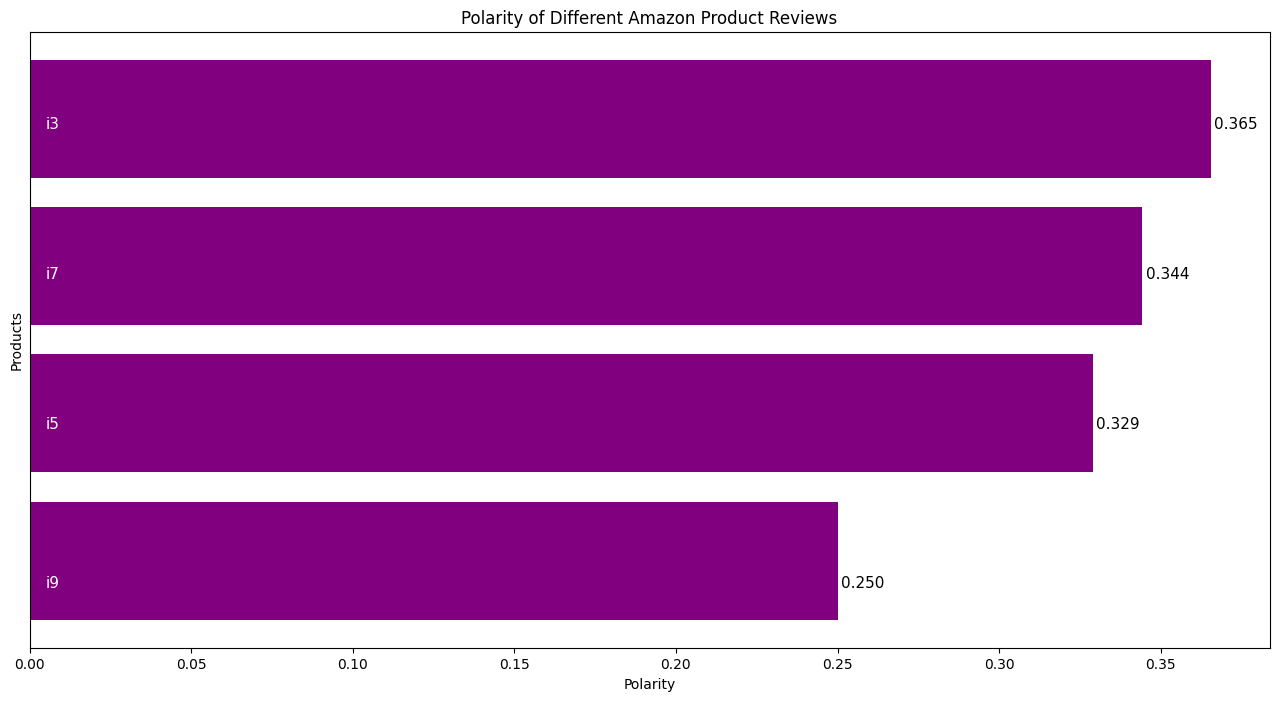

In [7]:
import numpy as np
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

product_polarity_sorted=pd.DataFrame(df.groupby('category')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

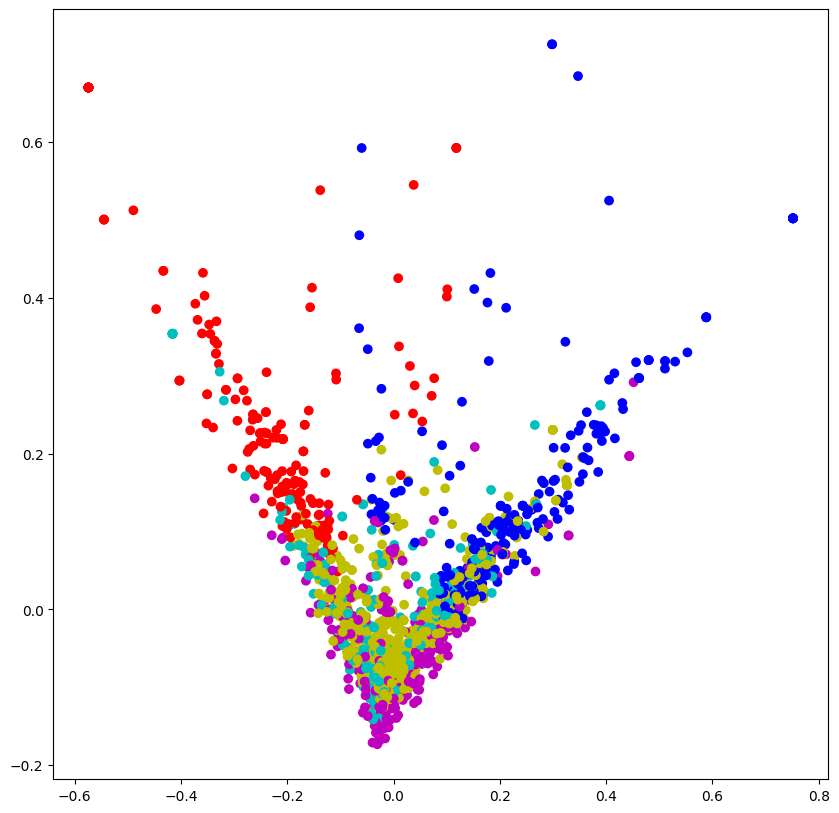

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Example TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
colors = ["r", "b", "c", "y", "m"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, c=[colors[d] for d in clusters])
plt.show()
